In [1]:
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('.duct/logs/summary.csv')
df

,exit_code,command,logs_prefix,wall_clock_time,peak_rss,average_rss,peak_vsz,average_vsz,peak_pmem,average_pmem,peak_pcpu,average_pcpu,num_samples,num_reports,start_time,end_time,config_dataset
0,2,python benchmark.py --dataset=data/dataset_0.zarr,.duct/logs/2025.02.26T16.19.57-2543548_,5.643819,521613312,2.858747e+08,1503252480,9.718285e+08,0.1,0.036364,94.4,70.900000,11,7,1.740583e+09,1.740583e+09,data/dataset_0.zarr
1,2,python benchmark.py --dataset=data/dataset_1.zarr,.duct/logs/2025.02.26T16.20.03-2543689_,4.837377,520458240,3.279696e+08,1501298688,1.079869e+09,0.1,0.040000,107.0,81.070000,10,6,1.740583e+09,1.740583e+09,data/dataset_1.zarr
2,0,python benchmark.py --dataset=data/dataset_0.zarr,.duct/logs/2025.02.26T16.20.52-2544129_,13.117721,824573952,5.639296e+08,3870625792,1.842429e+09,0.2,0.092000,107.0,93.084000,25,14,1.740583e+09,1.740583e+09,data/dataset_0.zarr
3,0,python benchmark.py --dataset=data/dataset_1.zarr,.duct/logs/2025.02.26T16.21.05-2544507_,12.142494,825569280,5.558044e+08,3773976576,1.774968e+09,0.2,0.091304,108.0,88.295652,23,13,1.740583e+09,1.740583e+09,data/dataset_1.zarr
4,0,python benchmark.py --dataset=data/dataset_2.zarr,.duct/logs/2025.02.26T16.21.17-2544682_,12.161388,849199104,5.623550e+08,3908239360,1.832831e+09,0.2,0.091304,160.0,99.704348,23,13,1.740583e+09,1.740583e+09,data/dataset_2.zarr


## Wall clock time

In [26]:
# sns.lineplot(data=df, x="config_duration", y="wall_clock_time", err_style="bars", errorbar=("se", 2), marker='o')

<Axes: xlabel='config_dataset', ylabel='wall_clock_time'>

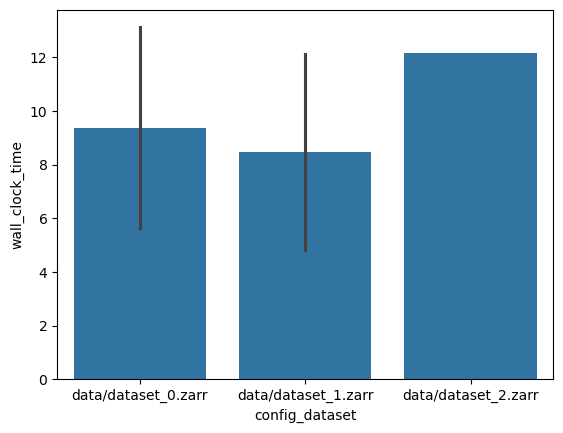

In [4]:
sns.barplot(data=df, x="config_dataset", y="wall_clock_time")

<Axes: xlabel='config_dataset', ylabel='peak_rss'>

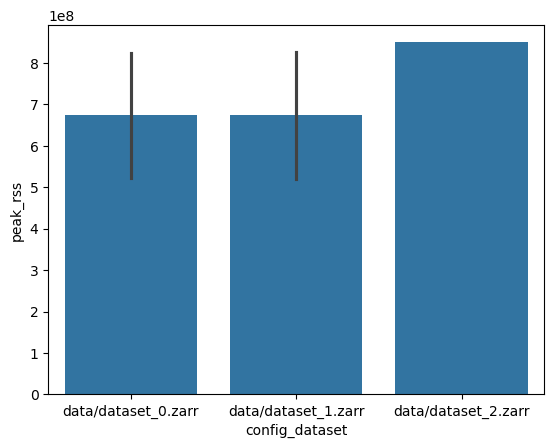

In [5]:
sns.barplot(data=df, x="config_dataset", y="peak_rss")